**###01. Import necessary libraries and project data**

In [2]:
#Import Libraries
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import scipy

In [5]:
#Import Dataset
path=r'C:\Users\north\08-2024 Instacart Basket Analysis'
cust_ordsmerge=pd.read_pickle(os.path.join(path, '02 Data','Prepared Data', 'customer_orders.merged.pkl'))

**###02. Create bar chart, histogram, scatterplot and a line chart**

In [8]:
cust_ordsmerge.columns

Index(['user_id', 'gender', 'state', 'age', 'date_joined', 'num_dependents',
       'family_status', 'income', 'order_id', 'order_number', 'order_weekday',
       'order_hour_of_day', 'days_since_prior_order', 'first_order',
       'product_id', 'add_to_cart_order', 'reordered', 'product_name',
       'aisle_id', 'department_id', 'prices', 'merge_flag', 'busiest_days',
       'busiest_period_of_day', 'max_order', 'loyalty_flag', 'user_spending',
       'spending_flag', 'order_frequency', 'frequency_flag'],
      dtype='object')

<Axes: xlabel='order_weekday'>

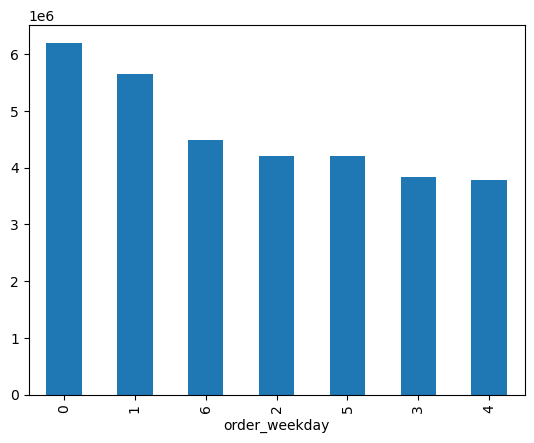

In [10]:
#Create a bar chart
cust_ordsmerge['order_weekday'].value_counts().plot.bar()

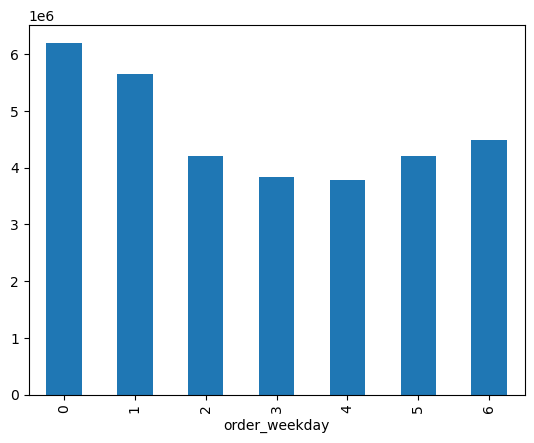

In [12]:
#Sort index
bar=cust_ordsmerge['order_weekday'].value_counts().sort_index().plot.bar()

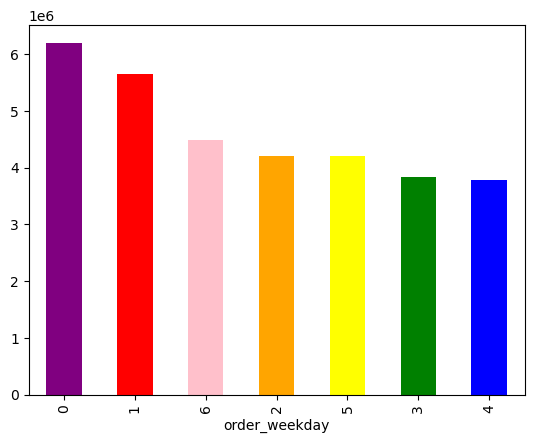

In [14]:
#Add Color to bar chart
bar = cust_ordsmerge['order_weekday'].value_counts().plot.bar(color =['purple', 'red', 'pink', 'orange', 'yellow', 'green', 'blue'])

<Axes: ylabel='Frequency'>

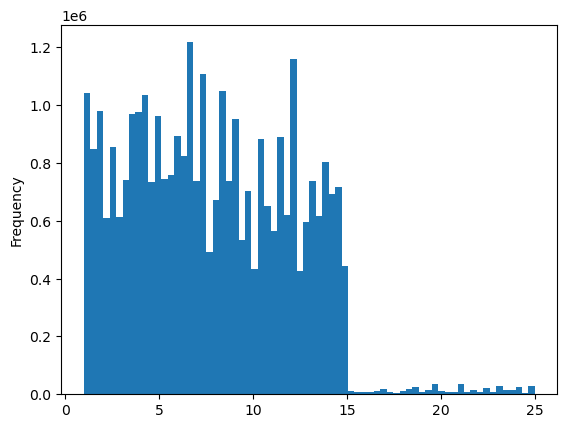

In [16]:
#Creating Histogram
cust_ordsmerge['prices'].plot.hist(bins = 70)

<Axes: xlabel='prices', ylabel='prices'>

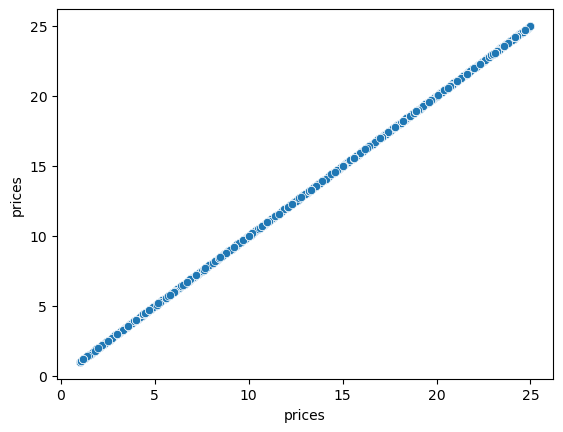

In [18]:
#Create Scatterplot
sns.scatterplot(x = 'prices', y = 'prices',data = cust_ordsmerge)

In [22]:
###Create a Line chart###
#Create a list holding True/False values to the test np.random.rant()<=0.7
np.random.seed(4)
dev = np.random.rand(len(cust_ordsmerge)) <= 0.7

In [21]:
len(cust_ordsmerge)

32404859

In [23]:
#Store 70% of the sample in the dataframe big
big = cust_ordsmerge[dev]

In [24]:
#Store 30% of the sample in the dataframe small
small = cust_ordsmerge[~dev]

In [29]:
#Reducing Samples to columns 'prices' and 'order_weekday'
df_2 = small[['order_weekday','prices']]

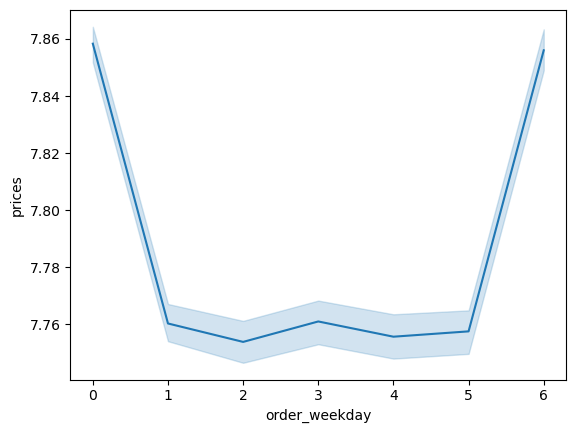

In [32]:
#Create Linechart
line = sns.lineplot(data = df_2, x = 'order_weekday',y = 'prices')

**###03. Descriptive finding about sales**

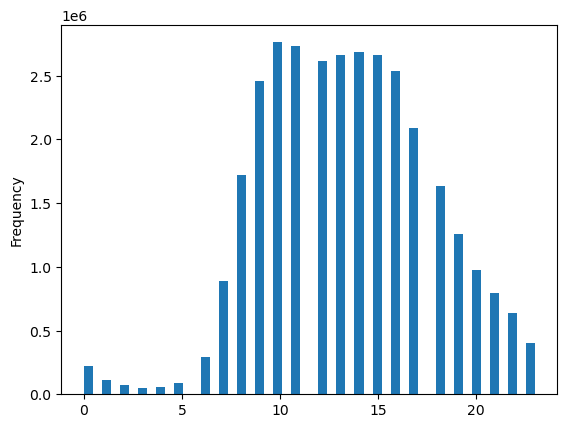

In [54]:
#Histogram of the “order_hour_of_day” column
histogram=cust_ordsmerge['order_hour_of_day'].plot.hist(bins = 50)

In [56]:
#Save histogram chart
histogram.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'histogram_sales.png'))

**Answer**: The histogram represents the distribution of orders placed throughout the day, as captured in the "order_hour_of_day" column. Each bar in the histogram shows the frequency of orders for each hour of the day, with the x-axis representing the hours (0-23) and the y-axis representing the frequency of orders.


The histogram shows that the majority of orders are placed between 10 AM and 3 PM, with a peak around 10 AM to 12 PM. There are significantly fewer orders during the early morning hours (midnight to 6 AM) and a steady decline in order frequency after 3 PM, with the lowest activity in the late evening. This pattern highlights the midday as the most active shopping period for customer.

**###04. Distribution of orders among customers in terms of loyalty**

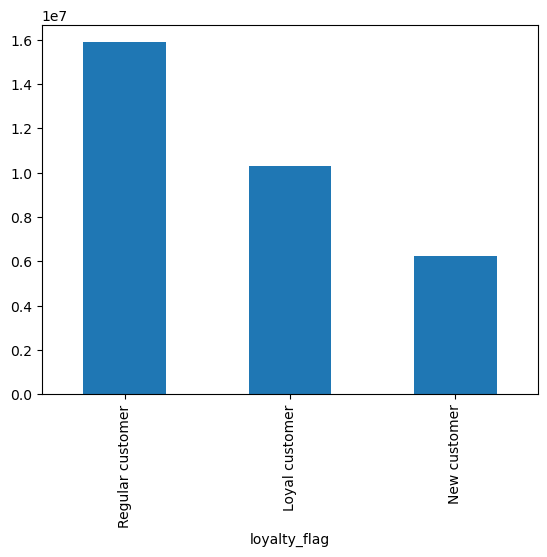

In [58]:
#Create a bar chart from the “loyalty_flag” column
bar=cust_ordsmerge['loyalty_flag'].value_counts().plot.bar()

In [60]:
#Save bar chart
bar.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'histogram_loyalty.png'))

**###05.Difference in Expenditure depending on hour of the day**

In [62]:
#Create a list holding True/False values to the test np.random.rant()<=0.7
np.random.seed(4)
dev = np.random.rand(len(cust_ordsmerge)) <= 0.7

In [64]:
len(cust_ordsmerge)

32404859

In [66]:
#Store 70% of the sample in the dataframe big
big = cust_ordsmerge[dev]

In [67]:
#Store 30% of the sample in the dataframe small
small = cust_ordsmerge[~dev]

In [72]:
len(big)+len(small)

32404859

In [70]:
#Reducing Samples to columns 'prices' and 'order_hour_of_day'
df_2 = small[['order_hour_of_day','prices']]

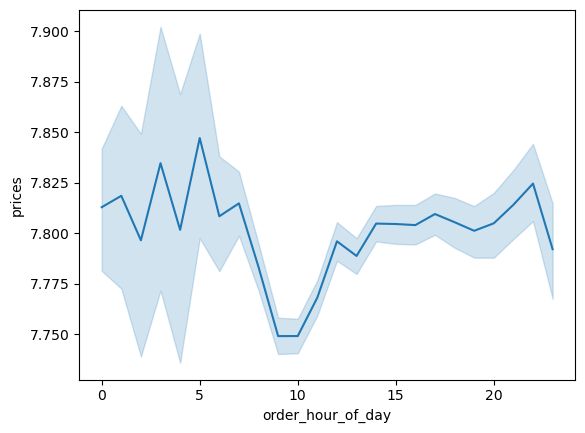

In [74]:
#Create Linechart
line = sns.lineplot(data = df_2, x = 'order_hour_of_day',y = 'prices')

In [77]:
#Save line chart
line.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'line_expenditure.png'))

**###06. Exploratory Analysis of customer demographics**

In [79]:
#Reducing Samples to columns 'age' and 'num_dependents'
df_3 = small[['age','num_dependents']]

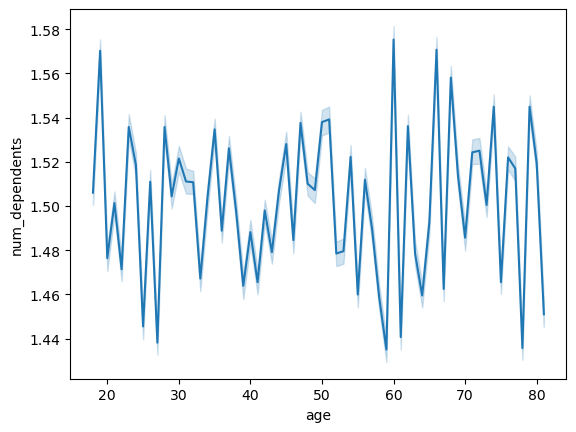

In [81]:
#Create Linechart
line2 = sns.lineplot(data = df_3, x = 'age',y = 'num_dependents')

In [89]:
#Save line chart
line2.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'line_demographics.png'))

**Answer:** The line chart illustrates the relationship between the customer's age and the average number of dependents they have. The chart reveals that the number of dependents varies quite a bit across different ages, with no clear pattern. This means that people of the same age can have very different family sizes, and age alone doesn’t strongly predict how many dependents someone might have. It suggests that other factors besides age are influencing family size.

**###07. Connection between age and spending power (income) - Scatterplot**

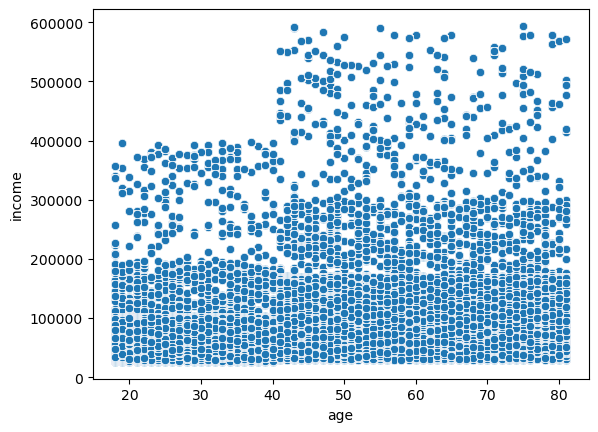

In [84]:
#Create Scatterplot
scatterplot=sns.scatterplot(x = 'age', y = 'income',data = cust_ordsmerge)

In [91]:
#Save scatterplot
scatterplot.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'scatterplot_spending.png'))

**Answer:** The scatterplot shows the relationship between age and income. The scatterplot shows that people tend to earn more as they get older, with incomes peaking between 40 and 60 years old. Younger people typically earn less, while income levels vary more widely in middle age. After 60, there are fewer high earners, which might be due to retirement or working less.